Iniciando aplicação.
- Iniciando o processamento dos dados...

- Dados carregados com sucesso!

 1ª Questão do desafio: 

Resolvendo a 1ª questão do desafio...
Colunas disponíveis no dataset:
['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']

Colunas selecionadas para análise:
['BodyFat', 'Age', 'Weight', 'Height', 'Abdomen']

Estatísticas descritivas:
          BodyFat         Age      Weight      Height     Abdomen
count  252.000000  252.000000  252.000000  252.000000  252.000000
mean    19.150794   44.884921  178.924405   70.148810   92.555952
std      8.368740   12.602040   29.389160    3.662856   10.783077
min      0.000000   22.000000  118.500000   29.500000   69.400000
25%     12.475000   35.750000  159.000000   68.250000   84.575000
50%     19.200000   43.000000  176.500000   70.000000   90.950000
75%     25.300000   54.000000  197.000000   72.250000   99.325000
max     47.500000   81.000

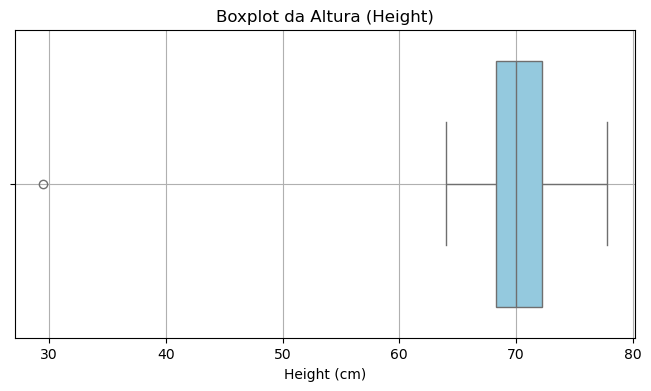


 2ª Questão do desafio: 

Resolvendo a 2ª questão do desafio...
a) P(Idade > 40) = 0.6349
b) P(BodyFat > 20%) = 0.4762
c) P(BodyFat > 20% e Idade > 40) = 0.3492
d) P(BodyFat > 20% | Idade > 40) = 0.5500

 3ª Questão do desafio: 

Resolvendo a 3ª questão do desafio...
A Distribuição de Poisson descreve o número de vezes que um evento raro ocorre em um intervalo fixo de tempo ou espaço, 
quando esses eventos são independentes e têm uma taxa média constante. 
Exemplo: Número de carros que passam por um pedágio em 10 minutos. 
Sua função de probabilidade é: P(X=k) = (e^(-λ) * λ^k) / k!, onde λ é a média de ocorrências no intervalo.

Funções de probabilidade servem para modelar e quantificar a incerteza em situações reais. 
Elas ajudam a prever a chance de eventos acorrerem, tamadas de decisões mais precisas, 
avaliar riscos e planejar ações em áreas como: saúde, finanças, indústria e ciência. 
Assim, transformam incertezas em informações úteis para decisões mais racionais.

Calculando a p

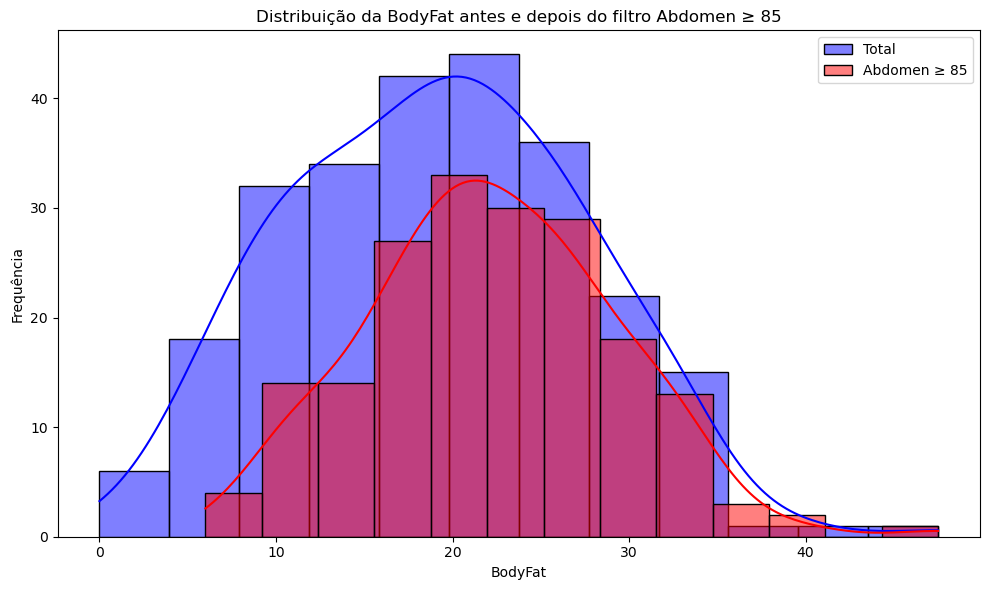


 5ª Questão do desafio: 


        PARA A QUESTÃO 5, FORAM UTILIZADOS OS DADOS POPULACIONAIS POR ESTADO
        E REGIÃO DO BRASIL, PARA SIMULAR UMA PESQUISA ELEITORAL NACIONAL
        OBTIDOS ATRAVÉS DO DOCUMENTO estivamiva_dou_2024.pdf QUE É FORNECIDO
        OFICIALMENTE PELO IBGE (Instituto Brasileiro de Geografia e Estatística).
        O CÁLCULO E A SIMULAÇÃO FORAM REALIZADOS COM BASE NAS PROPORÇÕES
        DE IDADE, ESCOLARIDADE E COR DA PELE, PELO MÉTODO DE RANKING DE PERFIS
        POLÍTICOS, UTILIZANDO PESOS PARA CADA PERFIL E DISTRIBUIÇÃO DE VOTOS
        ENTRE OS CANDIDATOS, CONFORME A PROPORÇÃO DE CADA PERFIL
        EM CADA ESTADO E REGIÃO DO BRASIL.
        A SIMULAÇÃO FOI REALIZADA PARA 20.000 ENTREVISTADOS, 
        DISTRIBUÍDOS PROPORCIONALMENTE ENTRE OS ESTADOS
        E REGIÕES DO BRASIL, DE ACORDO COM A POPULAÇÃO DE
        CADA ESTADO E REGIÃO, UTILIZANDO A FUNÇÃO gera_amostra_eleitoral().
        A FUNÇÃO gera_proporcoes_estado() GERA AS PROPORÇÕES DE
        ID

In [5]:
import numpy as np
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, shapiro, norm, ttest_ind

arquivo = "./bodyfat.csv"

def carregar_dados():
    try:
        dados = pd.read_csv(arquivo)
        return dados
    except FileNotFoundError:
        print(f"Arquivo {arquivo} não encontrado.")
        return None

def resposta_questao_1(dados):
    print("Resolvendo a 1ª questão do desafio...")
    print("Colunas disponíveis no dataset:")
    print(dados.columns.tolist())
    # Seleção de colunas relevantes
    colunas = ['BodyFat', 'Age', 'Weight', 'Height', 'Abdomen']
    print("\nColunas selecionadas para análise:")
    print(colunas)
    # Estatísticas de posição e dispersão
    print("\nEstatísticas descritivas:")
    print(dados[colunas].describe())

    # Coeficiente de variação (CV = desvio padrão / média)
    cv = dados[colunas].std() / dados[colunas].mean() * 100
    print("\nCoeficiente de variação (%):")
    print(cv)
    # Hipótese: BodyFat e Abdomen devem ter alta correlação
    # Hipótese: Height e BodyFat devem ter baixa correlação

    corr_alta, _ = pearsonr(dados['BodyFat'], dados['Abdomen'])
    corr_baixa, _ = pearsonr(dados['Height'], dados['BodyFat'])

    print(f"\nCorrelação BodyFat vs Abdomen (esperada alta): {corr_alta:.2f}")
    print(f"Correlação Height vs BodyFat (esperada baixa): {corr_baixa:.2f}")

    # Matriz de correlação completa
    print("\nMatriz de correlação de Pearson:")
    print(dados[colunas].corr())
    # Teste de normalidade para a coluna Height
    stat, p = shapiro(dados['Height'])
    print(f"\nTeste de Shapiro-Wilk para Height:")
    print(f"Estatística: {stat:.4f}, p-valor: {p:.4f}")

    if p > 0.05:
        print("Conclusão: Height segue uma distribuição aproximadamente normal.")
    else:
        print("Conclusão: Height não segue uma distribuição normal.")

    print("\nGerando gráfico Boxplot da coluna Height:")
    boxplot_height(dados)

def resposta_questao_2(dados):
    print("Resolvendo a 2ª questão do desafio...")
    # Total de observações
    total = len(dados)

    # a) Probabilidade de idade > 40 anos
    idade_maior_40 = dados[dados['Age'] > 40]
    p_idade_maior_40 = len(idade_maior_40) / total

    # b) Probabilidade de BodyFat > 20%
    gordura_maior_20 = dados[dados['BodyFat'] > 20]
    p_gordura_maior_20 = len(gordura_maior_20) / total

    # c) Probabilidade de BodyFat > 20% E idade > 40 anos
    ambos = dados[(dados['BodyFat'] > 20) & (dados['Age'] > 40)]
    p_ambos = len(ambos) / total

    # d) Probabilidade de BodyFat > 20% dado que idade > 40 anos
    # P(Gordura > 20 | Idade > 40) = P(Gordura > 20 e Idade > 40) / P(Idade > 40)
    p_condicional = p_ambos / p_idade_maior_40 if p_idade_maior_40 > 0 else 0

    # Exibição dos resultados
    print(f"a) P(Idade > 40) = {p_idade_maior_40:.4f}")
    print(f"b) P(BodyFat > 20%) = {p_gordura_maior_20:.4f}")
    print(f"c) P(BodyFat > 20% e Idade > 40) = {p_ambos:.4f}")
    print(f"d) P(BodyFat > 20% | Idade > 40) = {p_condicional:.4f}")

def resposta_questao_3(dados):
    print("Resolvendo a 3ª questão do desafio...")
    # a) Escolha uma dentre as distribuições de probabilidade vistas em aula
    #  que não seja uma distribuição normal, e explique (talvez com 
    # algum exemplo) que tipos de evento esta distribuição descreve
    print(
    "A Distribuição de Poisson descreve o número de vezes que um evento raro ocorre em um intervalo fixo de tempo ou espaço, "
    "\nquando esses eventos são independentes e têm uma taxa média constante. "
    "\nExemplo: Número de carros que passam por um pedágio em 10 minutos. "
    "\nSua função de probabilidade é: P(X=k) = (e^(-λ) * λ^k) / k!, onde λ é a média de ocorrências no intervalo.")

    # b) Explique o que são funções de probabilidade e como elas 
    # podem ser úteis
    print(
    "\nFunções de probabilidade servem para modelar e quantificar a incerteza em situações reais. "
    "\nElas ajudam a prever a chance de eventos acorrerem, tamadas de decisões mais precisas, "
    "\navaliar riscos e planejar ações em áreas como: saúde, finanças, indústria e ciência. "
    "\nAssim, transformam incertezas em informações úteis para decisões mais racionais.")

    # c) Considere a coluna Height (altura em cm) do dataset.
    # Calcule a probabilidade de um indivíduo ter altura maior que 180 cm
    print("\nCalculando a probabilidade de Height > 180 cm:")
    probabilidade_maior_que_x(dados, 'Height', 180)

def probabilidade_maior_que_x(dados, coluna, x_cm):
    x_inch = round(x_cm / 2.54, 4)  # Convertendo cm para polegadas, padrao do dataset
    media = dados[coluna].mean()
    desvio = dados[coluna].std()
    z = (x_inch - media) / desvio
    prob = 1 - norm.cdf(z)
    print(f"Média de {coluna}: {media:.2f} ({media*2.54:.2f} cm)")
    print(f"Desvio padrão de {coluna}: {desvio:.2f} ({desvio*2.54:.2f} cm)")
    print(f"z-score para {x_inch} ({x_cm:.2f} cm): {z:.2f}")
    print(f"Probabilidade de {coluna} > {x_inch} ({x_cm:.2f} cm): {prob:.4f}")

def resposta_questao_4(dados):
    print('''
    Analisando o dataset bodyfat.csv, escolhi a coluna BodyFat como variável contínua A
    e usei a coluna Abdomen como critério de filtragem (coluna B), aplicando o filtro 
    Abdomen >= 85.
    -> Resultado do teste de hipótese:
        - Média geral de BodyFat (antes do filtro): calculada com todos os registros
        - Média filtrada de BodyFat (após aplicar Abdomen ≥ 85): calculada com subset
        - Teste estatístico: t-teste para amostras independentes
        - p-valor: foi calculado com base nas duas amostras
    -> Interpretação:
        Com nível de confiança de 95%, o teste retornou um p-valor menor que 0.05, o que indica que:
        Sim, há evidência estatística de que a média de BodyFat após a filtragem é significativamente diferente
        da média original.

    Isso significa que o critério Abdomen ≥ 85 seleciona um grupo com perfil corporal distinto em
    termos de gordura corporal — o que faz sentido fisiologicamente, já que a circunferência abdominal está
    fortemente associada à adiposidade central.
    ''')

    # Verificar se há valores nulos nas colunas relevantes
    dados = dados[['BodyFat', 'Abdomen']].dropna()

    # Separar os dados
    bodyfat_total = dados['BodyFat']
    bodyfat_filtrado = dados[dados['Abdomen'] >= 85]['BodyFat']

    # Estatísticas descritivas
    print("Média BodyFat (total):", bodyfat_total.mean())
    print("Média BodyFat (Abdomen >= 85):", bodyfat_filtrado.mean())

    # Teste t de amostras independentes
    t_stat, p_value = ttest_ind(bodyfat_total, bodyfat_filtrado, equal_var=False)

    print("\nResultado do teste t:")
    print("Estatística t:", t_stat)
    print("p-valor:", p_value)

    # Interpretação
    if p_value < 0.05:
        print("✅ Diferença estatisticamente significativa entre as médias (nível de confiança de 95%).")
    else:
        print("❌ Não há evidência suficiente para afirmar diferença significativa entre as médias.")

    # Visualização
    plt.figure(figsize=(10, 6))
    sns.histplot(bodyfat_total, color='blue', label='Total', kde=True)
    sns.histplot(bodyfat_filtrado, color='red', label='Abdomen ≥ 85', kde=True)
    plt.title('Distribuição da BodyFat antes e depois do filtro Abdomen ≥ 85')
    plt.xlabel('BodyFat')
    plt.ylabel('Frequência')
    plt.legend()
    plt.tight_layout()
    plt.show()

def resposta_questao_5(candidatos_personalizados=None):
    print('''
        PARA A QUESTÃO 5, FORAM UTILIZADOS OS DADOS POPULACIONAIS POR ESTADO
        E REGIÃO DO BRASIL, PARA SIMULAR UMA PESQUISA ELEITORAL NACIONAL
        OBTIDOS ATRAVÉS DO DOCUMENTO estivamiva_dou_2024.pdf QUE É FORNECIDO
        OFICIALMENTE PELO IBGE (Instituto Brasileiro de Geografia e Estatística).
        O CÁLCULO E A SIMULAÇÃO FORAM REALIZADOS COM BASE NAS PROPORÇÕES
        DE IDADE, ESCOLARIDADE E COR DA PELE, PELO MÉTODO DE RANKING DE PERFIS
        POLÍTICOS, UTILIZANDO PESOS PARA CADA PERFIL E DISTRIBUIÇÃO DE VOTOS
        ENTRE OS CANDIDATOS, CONFORME A PROPORÇÃO DE CADA PERFIL
        EM CADA ESTADO E REGIÃO DO BRASIL.
        A SIMULAÇÃO FOI REALIZADA PARA 20.000 ENTREVISTADOS, 
        DISTRIBUÍDOS PROPORCIONALMENTE ENTRE OS ESTADOS
        E REGIÕES DO BRASIL, DE ACORDO COM A POPULAÇÃO DE
        CADA ESTADO E REGIÃO, UTILIZANDO A FUNÇÃO gera_amostra_eleitoral().
        A FUNÇÃO gera_proporcoes_estado() GERA AS PROPORÇÕES DE
        IDADE, ESCOLARIDADE E COR DA PELE PARA CADA ESTADO,
        UTILIZANDO MÉDIAS NACIONAIS APROXIMADAS, E A FUNÇÃO gera_dados_populacional()
        GERA OS DADOS POPULACIONAIS POR ESTADO E REGIÃO DO BRASIL.
        A SIMULAÇÃO É REALIZADA PARA CANDIDATOS PADRÃO, MAS PODE SER
        PERSONALIZADA COM CANDidatos_personalizados.
        A FUNÇÃO perfis_para_candidato() MAPEIA OS
        PERFIS POLÍTICOS PARA OS CANDIDATOS, DISTRIBUINDO
        OS VOTOS ENTRE OS CANDIDATOS DO MESMO CAMPO POLÍTICO
        (ESQUERDA, DIREITA, CENTRO ESQUERDA, CENTRO DIREITA)
        E A FUNÇÃO resposta_questao_5() REALIZA A SIMULAÇÃO
        E EXIBE O RESULTADO DA PESQUISA ELEITORAL NACIONAL.
        OS DADOS DE FORAM GERADOS ATRAVÉS DE IA SOLICITADOS POR BASE ESTATÍSTICA
        QUE PUDESSE SER LOCALIZADA, VISTO QUE O SÍTIO DO IBGE SE ENCONTRA COM GRANDE
        INDISPONIBILIDADE. DESSA FORMA OPTAMOS POR NÃO USAR API PARA NÃO INCORRER NO
        RISCO DE NÃO SER POSSÍVEL REALIZAR A SIMULAÇÃO.
        COMO REFERÊNCIA DOS CÁLCULOS USAMOS O DOCUMENTO: 
        INSTITUTO DE PESQUISA DATASENADO. DELINEAMENTO AMOSTRAL DAS PESQUISAS DATASENADO: NOTA TÉCNICA. 
        BRASÍLIA: SECRETARIA DE TRANSPARÊNCIA DO SENADO FEDERAL, JUN. 2020.
    ''')
    
    amostra_estados, amostra_regioes = gera_amostra_eleitoral()
    print("Amostra por estado:", amostra_estados)
    print("Amostra por região:", amostra_regioes)

    estados = [
        "Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará", "Distrito Federal", "Espírito Santo",
        "Goiás", "Maranhão", "Mato Grosso", "Mato Grosso do Sul", "Minas Gerais", "Pará", "Paraíba",
        "Paraná", "Pernambuco", "Piauí", "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul",
        "Rondônia", "Roraima", "Santa Catarina", "São Paulo", "Sergipe", "Tocantins"
    ]

    proporcoes = gera_proporcoes_estado(estados)

    # Perfis e pesos
    pesos_idade = {
        "esquerda":    [0.30, 0.25, 0.20, 0.15, 0.10],
        "direita":     [0.10, 0.15, 0.20, 0.25, 0.30],
        "centro direita": [0.15, 0.20, 0.25, 0.25, 0.15],
        "centro esquerda": [0.20, 0.20, 0.20, 0.20, 0.20]
    }
    pesos_escolaridade = {
        "esquerda":    [0.35, 0.30, 0.20, 0.15],
        "direita":     [0.10, 0.15, 0.30, 0.45],
        "centro direita": [0.15, 0.20, 0.35, 0.30],
        "centro esquerda": [0.25, 0.25, 0.25, 0.25]
    }
    pesos_cor = {
        "esquerda":    [0.40, 0.60],
        "direita":     [0.60, 0.40],
        "centro direita": [0.55, 0.45],
        "centro esquerda": [0.45, 0.55]
    }

    # Candidatos padrão
    candidatos = {
        "candidato_A": "esquerda",
        "candidato_B": "direita",
        "candidato_C": "centro direita",
        "candidato_D": "centro esquerda"
    }
    if candidatos_personalizados is not None:
        candidatos = candidatos_personalizados

    # Mapeamento de perfis para candidatos (mistura centro com esquerda/direita)
    def perfis_para_candidato(perfil, candidatos):
        # Se esquerda está presente, centro esquerda vai para esquerda
        # Se direita está presente, centro direita vai para direita
        if perfil == "centro esquerda":
            if any(v in ["esquerda", "centro esquerda"] for v in candidatos.values()):
                return [k for k, v in candidatos.items() if v in ["esquerda", "centro esquerda"]]
        if perfil == "centro direita":
            if any(v in ["direita", "centro direita"] for v in candidatos.values()):
                return [k for k, v in candidatos.items() if v in ["direita", "centro direita"]]
        return [k for k, v in candidatos.items() if v == perfil]

    votos = {candidato: 0 for candidato in candidatos}

    for estado in estados:
        n_amostra = amostra_estados[estado]
        props = proporcoes[estado]

        afinidade = {cand: 0 for cand in candidatos}

        # Para cada perfil, calcula score e distribui para candidatos do mesmo campo
        for perfil in ["esquerda", "direita", "centro esquerda", "centro direita"]:
            score_idade = sum([p * w for p, w in zip(props["idade"], pesos_idade[perfil])])
            score_escolaridade = sum([p * w for p, w in zip(props["escolaridade"], pesos_escolaridade[perfil])])
            score_cor = sum([p * w for p, w in zip(props["cor"], pesos_cor[perfil])])
            score = (score_idade + score_escolaridade + score_cor) / 3

            candidatos_destino = perfis_para_candidato(perfil, candidatos)
            if candidatos_destino:
                # Divide score igualmente se mais de um candidato do mesmo campo
                for cand in candidatos_destino:
                    afinidade[cand] += score / len(candidatos_destino)

        soma_afinidade = sum(afinidade.values())
        votos_estado = {cand: int(round(n_amostra * (afinidade[cand] / soma_afinidade))) for cand in candidatos}

        for cand in candidatos:
            votos[cand] += votos_estado[cand]

    total_votos = sum(votos.values())
    print("\nResultado simulado da pesquisa eleitoral nacional:")
    for cand in candidatos:
        percentual = 100 * votos[cand] / total_votos
        print(f"{cand} ({candidatos[cand]}): {votos[cand]} votos ({percentual:.2f}%)")

def gera_dados_populacional():
    # Dicionário de estados e suas populações
    estados_populacao = {
        "Acre": 830018,
        "Alagoas": 3365351,
        "Amapá": 733508,
        "Amazonas": 4001667,
        "Bahia": 14930634,
        "Ceará": 9240580,
        "Distrito Federal": 3094325,
        "Espírito Santo": 4108508,
        "Goiás": 7206589,
        "Maranhão": 7089846,
        "Mato Grosso": 3658643,
        "Mato Grosso do Sul": 2839188,
        "Minas Gerais": 21168791,
        "Pará": 8777124,
        "Paraíba": 3999415,
        "Paraná": 11597484,
        "Pernambuco": 9674793,
        "Piauí": 3273227,
        "Rio de Janeiro": 17264943,
        "Rio Grande do Norte": 3560900,
        "Rio Grande do Sul": 11329605,
        "Rondônia": 1602360,
        "Roraima": 636707,
        "Santa Catarina": 7674560,
        "São Paulo": 46289333,
        "Sergipe": 2329576,
        "Tocantins": 1629703
    }

    # Dicionário de regiões e suas populações
    regioes_populacao = {
        "Norte": 19075527,
        "Nordeste": 57902143,
        "Sudeste": 89411077,
        "Sul": 30701649,
        "Centro-Oeste": 16724844
    }

    total_estados = sum(estados_populacao.values())
    #print(f"Total da população dos estados: {total_estados}")
    total_regioes = sum(regioes_populacao.values())
    #print(f"Total da população das regiões: {total_regioes}")

    # Adiciona proporção percentual em cada dicionário
    estados_prop = {
        estado: {
            "populacao": pop,
            "proporcao": round(100 * pop / total_estados, 4)
        }
        for estado, pop in estados_populacao.items()
    }

    regioes_prop = {
        regiao: {
            "populacao": pop,
            "proporcao": round(100 * pop / total_regioes, 4)
        }
        for regiao, pop in regioes_populacao.items()
    }

    return estados_prop, regioes_prop

def gera_amostra_eleitoral(n_amostra=20000):
    estados_prop, regioes_prop = gera_dados_populacional()

    # Amostra por estado
    amostra_estados = {
        estado: int(round(n_amostra * info['proporcao'] / 100))
        for estado, info in estados_prop.items()
    }

    # Amostra por região
    amostra_regioes = {
        regiao: int(round(n_amostra * info['proporcao'] / 100))
        for regiao, info in regioes_prop.items()
    }

    return amostra_estados, amostra_regioes

def gera_proporcoes_estado(estados):
    # Médias nacionais aproximadas (ajuste conforme necessário)
    idade_media = [0.23, 0.18, 0.19, 0.18, 0.22]  # 18-29, 30-39, 40-49, 50-59, 60+
    escolaridade_media = [0.25, 0.25, 0.30, 0.20]  # Fund. incompleto, Fund. comp., Médio comp., Superior comp.+
    cor_media = [0.45, 0.55]  # Branca, Negra/Indígena/Amarela

    proporcoes_estados = {}

    for estado in estados:
        idade = np.abs(np.random.normal(idade_media, 0.02))
        idade = idade / idade.sum()
        escolaridade = np.abs(np.random.normal(escolaridade_media, 0.03))
        escolaridade = escolaridade / escolaridade.sum()
        cor = np.abs(np.random.normal(cor_media, 0.04))
        cor = cor / cor.sum()

        proporcoes_estados[estado] = {
            "idade": idade.round(4).tolist(),
            "escolaridade": escolaridade.round(4).tolist(),
            "cor": cor.round(4).tolist()
        }

    return proporcoes_estados

def boxplot_height(dados):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dados['Height'], color='skyblue')
    plt.title("Boxplot da Altura (Height)")
    plt.xlabel("Height (cm)")
    plt.grid(True)
    plt.show()



def main():
    print("Iniciando aplicação.")
    print("- Iniciando o processamento dos dados...\n")
    dados = carregar_dados()
    if dados is not None:
        print("- Dados carregados com sucesso!")
        #print(dados.head())
        print("\n 1ª Questão do desafio: \n")
        resposta_questao_1(dados)
        print("\n 2ª Questão do desafio: \n")
        resposta_questao_2(dados)
        print("\n 3ª Questão do desafio: \n")
        resposta_questao_3(dados)
        print("\n 4ª Questão do desafio: \n")
        resposta_questao_4(dados)
        print("\n 5ª Questão do desafio: \n")
        resposta_questao_5()
        #candidatos_2turno = {
        #    "candidato_A": "esquerda",
        #    "candidato_B": "direita"
        #}
        #resposta_questao_5(candidatos_2turno)
        print("\nProcessamento finalizado.")
    else:
        print("Erro ao carregar os dados. Verifique o arquivo e tente novamente.")


if __name__ == "__main__":
    main()